In [ ]:
import pandas as pd
!pip install pulp
from pulp import LpMaximize, LpProblem, LpVariable, lpSum, value

# Define the data
data = {
    "Criteria": ["App usability", "App usability - App download/update", "App usability - App lagging/crashing",
                 "App usability - Buying process", "App usability - Product search", "App usability - UI/UX",
                 "Delivery", "Delivery - Delivery Quality", "Delivery - Shipping Fee", "Marketing",
                 "Marketing - Advertising frequency", "Marketing - Newbies guide/gamification",
                 "Marketing - Voucher and discount", "Payment", "Payment - Cash on delivery",
                 "Payment - E-wallet", "Payment - Payment Issue", "Security", "Security - Scam/Fraud detection",
                 "Security - Security issue", "Service Quality", "Service Quality - After service",
                 "Service Quality - Customer service"],
    "Very Satisfied": [15487, 7645, 1524, 1147, 1767, 3404, 18251, 14450, 3801, 17788, 11900, 3468, 2420, 6430, 2656,
                       3216, 558, 8575, 8400, 175, 6444, 340, 6104],
    "Satisfied": [2767, 809, 419, 265, 442, 832, 3137, 2359, 778, 1584, 530, 633, 421, 1197, 557, 518, 122, 714, 687,
                  27, 505, 36, 469],
    "Neutral": [2828, 596, 401, 248, 468, 1115, 3748, 2895, 853, 1747, 424, 842, 481, 1287, 643, 525, 119, 1078, 1059,
                19, 463, 19, 444],
    "Not Satisfied": [3498, 356, 242, 237, 498, 2165, 5952, 5037, 915, 1854, 341, 1036, 477, 1089, 596, 396, 97, 2087,
                      2084, 3, 1004, 27, 977],
    "Very Not Satisfied": [21252, 2073, 210, 1232, 1412, 16325, 40478, 36100, 4378, 9156, 803, 5516, 2837, 4259, 2004,
                           2076, 179, 16018, 16011, 7, 9535, 106, 9429],
    "Total": [45832, 11479, 2796, 3129, 4587, 23841, 71566, 60841, 10725, 32129, 13998, 11495, 6636, 14262, 6456, 6731,
              1075, 28472, 28241, 231, 17951, 528, 17423],
    "Weight": [0.22, 0.05, 0.01, 0.01, 0.02, 0.11, 0.34, 0.29, 0.05, 0.15, 0.07, 0.05, 0.03, 0.07, 0.03, 0.03, 0.01,
               0.14, 0.13, 0.00, 0.09, 0.00, 0.08]
}

df = pd.DataFrame(data)

# Define the number of satisfaction levels
num_levels = 5

# Define number of criteria
num_criteria = len(df)

# Problem setup
model = LpProblem(name="MUSA-satisfaction", sense=LpMaximize)

# Define the decision variables
weights = LpVariable.dicts("weight", range(num_criteria), lowBound=0, upBound=1)
errors_pos = LpVariable.dicts("sigma_plus", range(num_criteria), lowBound=0)
errors_neg = LpVariable.dicts("sigma_minus", range(num_criteria), lowBound=0)
z = LpVariable.dicts("z", range(num_levels), lowBound=0)

# Objective function: Minimize sum of errors
model += lpSum(errors_pos[j] + errors_neg[j] for j in range(num_criteria))

# Constraints: Satisfaction calculation
for j in range(num_criteria):
    model += (lpSum(weights[i] * df["Weight"][i] for i in range(num_criteria)) -
              lpSum(z[m] for m in range(num_levels)) -
              errors_pos[j] + errors_neg[j] == 0)

# Normalization constraints
model += lpSum(z[m] for m in range(num_levels)) == 100
model += lpSum(weights[i] for i in range(num_criteria)) == 100

# Solve the problem
model.solve()



-1

In [ ]:
# Extract results
results = {
    "Weights": [value(weights[i]) for i in range(num_criteria)],
    "Errors_Pos": [value(errors_pos[j]) for j in range(num_criteria)],
    "Errors_Neg": [value(errors_neg[j]) for j in range(num_criteria)],
    "Z": [value(z[m]) for m in range(num_levels)]
}

# Ensure the results lists have the same length
max_len = max(len(results["Weights"]), len(results["Errors_Pos"]), len(results["Errors_Neg"]))
for key in results:
    if len(results[key]) < max_len:
        results[key] += [None] * (max_len - len(results[key]))

results_df = pd.DataFrame(results)
print(results_df)

# Display results
results_df

    Weights    Errors_Pos    Errors_Neg      Z
0       1.0  3.125000e+12  3.125000e+12  100.0
1       1.0  3.125000e+12  3.125000e+12    0.0
2       1.0  3.125000e+12  3.125000e+12    0.0
3       1.0  3.125000e+12  3.125000e+12    0.0
4       1.0  3.125000e+12  3.125000e+12    0.0
5       1.0  3.125000e+12  3.125000e+12    NaN
6       1.0  3.125000e+12  3.125000e+12    NaN
7       1.0  3.125000e+12  3.125000e+12    NaN
8       1.0  3.125000e+12  3.125000e+12    NaN
9       1.0  3.125000e+12  3.125000e+12    NaN
10      1.0  3.125000e+12  3.125000e+12    NaN
11      1.0  3.125000e+12  3.125000e+12    NaN
12      1.0  3.125000e+12  3.125000e+12    NaN
13      1.0  3.125000e+12  3.125000e+12    NaN
14      1.0  3.125000e+12  3.125000e+12    NaN
15      1.0  3.125000e+12  3.125000e+12    NaN
16      1.0  3.125000e+12  3.125000e+12    NaN
17      1.0  3.125000e+12  3.125000e+12    NaN
18      1.0  3.125000e+12  3.125000e+12    NaN
19      1.0  3.125000e+12  3.125000e+12    NaN
20      1.0  

,Weights,Errors_Pos,Errors_Neg,Z
0,1.0,3.125000e+12,3.125000e+12,100.0
1,1.0,3.125000e+12,3.125000e+12,0.0
2,1.0,3.125000e+12,3.125000e+12,0.0
3,1.0,3.125000e+12,3.125000e+12,0.0
4,1.0,3.125000e+12,3.125000e+12,0.0
5,1.0,3.125000e+12,3.125000e+12,NaN
6,1.0,3.125000e+12,3.125000e+12,NaN
7,1.0,3.125000e+12,3.125000e+12,NaN
8,1.0,3.125000e+12,3.125000e+12,NaN
9,1.0,3.125000e+12,3.125000e+12,NaN


In [ ]:
from pulp import LpMinimize
data = {
    "Criteria": ["App usability", "App usability - App download/update", "App usability - App lagging/crashing",
                 "App usability - Buying process", "App usability - Product search", "App usability - UI/UX",
                 "Delivery", "Delivery - Delivery Quality", "Delivery - Shipping Fee", "Marketing",
                 "Marketing - Advertising frequency", "Marketing - Newbies guide/gamification",
                 "Marketing - Voucher and discount", "Payment", "Payment - Cash on delivery",
                 "Payment - E-wallet", "Payment - Payment Issue", "Security", "Security - Scam/Fraud detection",
                 "Security - Security issue", "Service Quality", "Service Quality - After service",
                 "Service Quality - Customer service"],
    "Weight": [0.22, 0.05, 0.01, 0.01, 0.02, 0.11, 0.34, 0.29, 0.05, 0.15, 0.07, 0.05, 0.03, 0.07, 0.03, 0.03, 0.01,
               0.14, 0.13, 0.00, 0.09, 0.00, 0.08]
}

df = pd.DataFrame(data)

# Define the number of satisfaction levels
num_levels = 5

# Define number of criteria
num_criteria = len(df)

# Problem setup
model = LpProblem(name="MUSA-satisfaction", sense=LpMinimize)

# Define the decision variables
weights = LpVariable.dicts("weight", range(num_criteria), lowBound=0, upBound=1)
errors_pos = LpVariable.dicts("sigma_plus", range(num_criteria), lowBound=0)
errors_neg = LpVariable.dicts("sigma_minus", range(num_criteria), lowBound=0)
z = LpVariable.dicts("z", range(num_levels), lowBound=0)

# Objective function: Minimize sum of errors
model += lpSum(errors_pos[j] + errors_neg[j] for j in range(num_criteria))

# Constraints: Satisfaction calculation
for j in range(num_criteria):
    model += (lpSum(weights[i] * df["Weight"][i] for i in range(num_criteria)) -
              lpSum(z[m] for m in range(num_levels)) -
              errors_pos[j] + errors_neg[j] == 0)

# Normalization constraints
model += lpSum(z[m] for m in range(num_levels)) == 100
model += lpSum(weights[i] for i in range(num_criteria)) == 100

# Solve the problem
model.solve()

# Extract results
results = {
    "Weights": [value(weights[i]) for i in range(num_criteria)],
    "Errors_Pos": [value(errors_pos[j]) for j in range(num_criteria)],
    "Errors_Neg": [value(errors_neg[j]) for j in range(num_criteria)],
    "Z": [value(z[m]) for m in range(num_levels)]
}

# Ensure the results lists have the same length
max_len = max(len(results["Weights"]), len(results["Errors_Pos"]), len(results["Errors_Neg"]))
for key in results:
    if len(results[key]) < max_len:
        results[key] += [None] * (max_len - len(results[key]))

results_df = pd.DataFrame(results)
print(results_df)

# Display results
results_df

    Weights  Errors_Pos  Errors_Neg      Z
0       1.0         0.0       98.02  100.0
1       1.0         0.0       98.02    0.0
2       1.0         0.0       98.02    0.0
3       1.0         0.0       98.02    0.0
4       1.0         0.0       98.02    0.0
5       1.0         0.0       98.02    NaN
6       1.0         0.0       98.02    NaN
7       1.0         0.0       98.02    NaN
8       1.0         0.0       98.02    NaN
9       1.0         0.0       98.02    NaN
10      1.0         0.0       98.02    NaN
11      1.0         0.0       98.02    NaN
12      1.0         0.0       98.02    NaN
13      1.0         0.0       98.02    NaN
14      1.0         0.0       98.02    NaN
15      1.0         0.0       98.02    NaN
16      1.0         0.0       98.02    NaN
17      1.0         0.0       98.02    NaN
18      1.0         0.0       98.02    NaN
19      1.0         0.0       98.02    NaN
20      1.0         0.0       98.02    NaN
21     78.0         0.0       98.02    NaN
22      1.0

,Weights,Errors_Pos,Errors_Neg,Z
0,1.0,0.0,98.02,100.0
1,1.0,0.0,98.02,0.0
2,1.0,0.0,98.02,0.0
3,1.0,0.0,98.02,0.0
4,1.0,0.0,98.02,0.0
5,1.0,0.0,98.02,NaN
6,1.0,0.0,98.02,NaN
7,1.0,0.0,98.02,NaN
8,1.0,0.0,98.02,NaN
9,1.0,0.0,98.02,NaN


In [ ]:


# Define the data
data = {
    "Criteria": ["App usability", "App usability - App download/update", "App usability - App lagging/crashing",
                 "App usability - Buying process", "App usability - Product search", "App usability - UI/UX",
                 "Delivery", "Delivery - Delivery Quality", "Delivery - Shipping Fee", "Marketing",
                 "Marketing - Advertising frequency", "Marketing - Newbies guide/gamification",
                 "Marketing - Voucher and discount", "Payment", "Payment - Cash on delivery",
                 "Payment - E-wallet", "Payment - Payment Issue", "Security", "Security - Scam/Fraud detection",
                 "Security - Security issue", "Service Quality", "Service Quality - After service",
                 "Service Quality - Customer service"],
    "Weight": [0.22, 0.05, 0.01, 0.01, 0.02, 0.11, 0.34, 0.29, 0.05, 0.15, 0.07, 0.05, 0.03, 0.07, 0.03, 0.03, 0.01,
               0.14, 0.13, 0.00, 0.09, 0.00, 0.08]
}

df = pd.DataFrame(data)

# Define the number of satisfaction levels
num_levels = 5

# Define number of criteria
num_criteria = len(df)

# Normalized overall satisfaction score
overall_satisfaction_score = 4.2
normalized_overall_satisfaction = (overall_satisfaction_score / 5) * 100

# Problem setup
model = LpProblem(name="MUSA-satisfaction", sense=LpMinimize)

# Define the decision variables
weights = LpVariable.dicts("weight", range(num_criteria), lowBound=0, upBound=1)
errors_pos = LpVariable.dicts("sigma_plus", range(num_criteria), lowBound=0)
errors_neg = LpVariable.dicts("sigma_minus", range(num_criteria), lowBound=0)
z = LpVariable.dicts("z", range(num_criteria), lowBound=0)
global_satisfaction = LpVariable("global_satisfaction", lowBound=0)

# Objective function: Minimize sum of errors
model += lpSum(errors_pos[j] + errors_neg[j] for j in range(num_criteria))

# Constraints: Calculate global satisfaction as weighted sum of criteria
model += (global_satisfaction == lpSum(weights[i] * df["Weight"][i] for i in range(num_criteria)))

# Constraints: Ensure global satisfaction matches the normalized overall satisfaction
model += global_satisfaction == normalized_overall_satisfaction

# Normalization constraints for Z values
model += lpSum(z[j] for j in range(num_criteria)) == 100
model += lpSum(weights[i] for i in range(num_criteria)) == 1

# Constraints to keep weights consistent with provided weights
for i in range(num_criteria):
    model += weights[i] == df["Weight"][i]

# Solve the problem
model.solve()

# Extract results
results = {
    "Criteria": df["Criteria"],
    "Weights": [value(weights[i]) for i in range(num_criteria)],
    "Errors_Pos": [value(errors_pos[j]) for j in range(num_criteria)],
    "Errors_Neg": [value(errors_neg[j]) for j in range(num_criteria)],
    "Z": [value(z[j]) for j in range(num_criteria)],
    "Global_Satisfaction": [value(global_satisfaction)] * num_criteria  # Repeat global satisfaction value
}

results_df = pd.DataFrame(results)
print(results_df)

# Display results
results_df

                                  Criteria  Weights  Errors_Pos  Errors_Neg  \
0                            App usability      1.0         0.0         0.0   
1      App usability - App download/update      1.0         0.0         0.0   
2     App usability - App lagging/crashing      0.0         0.0         0.0   
3           App usability - Buying process      0.0         0.0         0.0   
4           App usability - Product search      1.0         0.0         0.0   
5                    App usability - UI/UX      1.0         0.0         0.0   
6                                 Delivery      1.0         0.0         0.0   
7              Delivery - Delivery Quality      1.0         0.0         0.0   
8                  Delivery - Shipping Fee      1.0         0.0         0.0   
9                                Marketing      1.0         0.0         0.0   
10       Marketing - Advertising frequency      1.0         0.0         0.0   
11  Marketing - Newbies guide/gamification      1.0 

,Criteria,Weights,Errors_Pos,Errors_Neg,Z,Global_Satisfaction
0,App usability,1.0,0.0,0.0,0.0,84.0
1,App usability - App download/update,1.0,0.0,0.0,0.0,84.0
2,App usability - App lagging/crashing,0.0,0.0,0.0,0.0,84.0
3,App usability - Buying process,0.0,0.0,0.0,0.0,84.0
4,App usability - Product search,1.0,0.0,0.0,0.0,84.0
5,App usability - UI/UX,1.0,0.0,0.0,0.0,84.0
6,Delivery,1.0,0.0,0.0,0.0,84.0
7,Delivery - Delivery Quality,1.0,0.0,0.0,0.0,84.0
8,Delivery - Shipping Fee,1.0,0.0,0.0,0.0,84.0
9,Marketing,1.0,0.0,0.0,0.0,84.0


In [ ]:
import pandas as pd

# Load the data
data = {
    "Criteria": ["App usability", "App usability - App download/update", "App usability - App lagging/crashing",
                 "App usability - Buying process", "App usability - Product search", "App usability - UI/UX",
                 "Delivery", "Delivery - Delivery Quality", "Delivery - Shipping Fee", "Marketing",
                 "Marketing - Advertising frequency", "Marketing - Newbies guide/gamification",
                 "Marketing - Voucher and discount", "Payment", "Payment - Cash on delivery",
                 "Payment - E-wallet", "Payment - Payment Issue", "Security", "Security - Scam/Fraud detection",
                 "Security - Security issue", "Service Quality", "Service Quality - After service",
                 "Service Quality - Customer service"],
    "Very_Satisfied": [15487, 7645, 1524, 1147, 1767, 3404, 18251, 14450, 3801, 17788, 11900, 3468, 2420, 6430, 2656,
                       3216, 558, 8575, 8400, 175, 6444, 340, 6104],
    "Satisfied": [2767, 809, 419, 265, 442, 832, 3137, 2359, 778, 1584, 530, 633, 421, 1197, 557, 518, 122, 714, 687,
                  27, 505, 36, 469],
    "Neutral": [2828, 596, 401, 248, 468, 1115, 3748, 2895, 853, 1747, 424, 842, 481, 1287, 643, 525, 119, 1078, 1059,
                19, 463, 19, 444],
    "Not_Satisfied": [3498, 356, 242, 237, 498, 2165, 5952, 5037, 915, 1854, 341, 1036, 477, 1089, 596, 396, 97, 2087,
                      2084, 3, 1004, 27, 977],
    "Very_Not_Satisfied": [21252, 2073, 210, 1232, 1412, 16325, 40478, 36100, 4378, 9156, 803, 5516, 2837, 4259, 2004,
                           2076, 179, 16018, 16011, 7, 9535, 106, 9429],
    "Weight": [0.22, 0.05, 0.01, 0.01, 0.02, 0.11, 0.34, 0.29, 0.05, 0.15, 0.07, 0.05, 0.03, 0.07, 0.03, 0.03, 0.01,
               0.14, 0.13, 0.00, 0.09, 0.00, 0.08]
}

df = pd.DataFrame(data)

# Define number of satisfaction levels (Very Satisfied, Satisfied, Neutral, Not Satisfied, Very Not Satisfied)
alpha = 5

# Calculate global and partial demanding indices
D = (1 / (alpha - 1)) * sum((m / (alpha - 1) - df["Very_Satisfied"].mean()) for m in range(1, alpha))
D_i_list = []

for i in range(len(df)):
    D_i = (1 / (alpha - 1)) * sum((k / (alpha - 1) - df.iloc[i]["Very_Satisfied"]) for k in range(1, alpha))
    D_i_list.append(D_i)

df["Global_Demanding_Index"] = D
df["Partial_Demanding_Indices"] = D_i_list

print(df)

                                  Criteria  Very_Satisfied  Satisfied  \
0                            App usability           15487       2767   
1      App usability - App download/update            7645        809   
2     App usability - App lagging/crashing            1524        419   
3           App usability - Buying process            1147        265   
4           App usability - Product search            1767        442   
5                    App usability - UI/UX            3404        832   
6                                 Delivery           18251       3137   
7              Delivery - Delivery Quality           14450       2359   
8                  Delivery - Shipping Fee            3801        778   
9                                Marketing           17788       1584   
10       Marketing - Advertising frequency           11900        530   
11  Marketing - Newbies guide/gamification            3468        633   
12        Marketing - Voucher and discount         

In [ ]:
df

,Criteria,Very_Satisfied,Satisfied,Neutral,Not_Satisfied,Very_Not_Satisfied,Weight,Global_Demanding_Index,Partial_Demanding_Indices
0,App usability,15487,2767,2828,3498,21252,0.22,-6345.027174,-15486.375
1,App usability - App download/update,7645,809,596,356,2073,0.05,-6345.027174,-7644.375
2,App usability - App lagging/crashing,1524,419,401,242,210,0.01,-6345.027174,-1523.375
3,App usability - Buying process,1147,265,248,237,1232,0.01,-6345.027174,-1146.375
4,App usability - Product search,1767,442,468,498,1412,0.02,-6345.027174,-1766.375
5,App usability - UI/UX,3404,832,1115,2165,16325,0.11,-6345.027174,-3403.375
6,Delivery,18251,3137,3748,5952,40478,0.34,-6345.027174,-18250.375
7,Delivery - Delivery Quality,14450,2359,2895,5037,36100,0.29,-6345.027174,-14449.375
8,Delivery - Shipping Fee,3801,778,853,915,4378,0.05,-6345.027174,-3800.375
9,Marketing,17788,1584,1747,1854,9156,0.15,-6345.027174,-17787.375


In [ ]:
import pandas as pd

# Define the data from the table
data = {
    "Criteria": ["App usability", "App usability - App download/update", "App usability - App lagging/crashing",
                 "App usability - Buying process", "App usability - Product search", "App usability - UI/UX",
                 "Delivery", "Delivery - Delivery Quality", "Delivery - Shipping Fee", "Marketing",
                 "Marketing - Advertising frequency", "Marketing - Newbies guide/gamification",
                 "Marketing - Voucher and discount", "Payment", "Payment - Cash on delivery",
                 "Payment - E-wallet", "Payment - Payment Issue", "Security", "Security - Scam/Fraud detection",
                 "Security - Security issue", "Service Quality", "Service Quality - After service",
                 "Service Quality - Customer service"],
    "Very Satisfied": [15487, 7645, 1524, 1147, 1767, 3404, 18251, 14450, 3801, 17788, 11900, 3468, 2420, 6430, 2656, 3216, 558, 8575, 8400, 175, 6444, 340, 6104],
    "Satisfied": [2767, 809, 419, 265, 442, 832, 3137, 2359, 778, 1584, 530, 633, 421, 1197, 557, 518, 122, 714, 687, 27, 505, 36, 469],
    "Neutral": [2828, 596, 401, 248, 468, 1115, 3748, 2895, 853, 1747, 424, 842, 481, 1287, 643, 525, 119, 1078, 1059, 19, 463, 19, 444],
    "Not Satisfied": [3498, 356, 242, 237, 498, 2165, 5952, 5037, 915, 1854, 341, 1036, 477, 1089, 596, 396, 97, 2087, 2084, 3, 1004, 27, 977],
    "Very Not Satisfied": [21252, 2073, 210, 1232, 1412, 16325, 40478, 36100, 4378, 9156, 803, 5516, 2837, 4259, 2004, 2076, 179, 16018, 16011, 7, 9535, 106, 9429],
    "Total": [45832, 11479, 2796, 3129, 4587, 23841, 71566, 60841, 10725, 32129, 13998, 11495, 6636, 14262, 6456, 6731, 1075, 28472, 28241, 231, 17951, 528, 17423],
    "Weight": [0.22, 0.05, 0.01, 0.01, 0.02, 0.11, 0.34, 0.29, 0.05, 0.15, 0.07, 0.05, 0.03, 0.07, 0.03, 0.03, 0.01,
               0.14, 0.13, 0.00, 0.09, 0.00, 0.08]
}

df = pd.DataFrame(data)

# Define the number of satisfaction levels (α)
alpha = 5

# Calculate frequencies (p_m and p_i^k) for each satisfaction level
df["p_Very_Satisfied"] = df["Very Satisfied"] / df["Total"]
df["p_Satisfied"] = df["Satisfied"] / df["Total"]
df["p_Neutral"] = df["Neutral"] / df["Total"]
df["p_Not_Satisfied"] = df["Not Satisfied"] / df["Total"]
df["p_Very_Not_Satisfied"] = df["Very Not Satisfied"] / df["Total"]

# Define normalized satisfaction levels (y_m^* and x_ik^*)
# Assuming that y_m^* and x_ik^* correspond to the scores 5, 4, 3, 2, and 1 respectively
y_m_star = [5, 4, 3, 2, 1]

# Calculate Global Satisfaction Index (S)
S = (1 / 100) * (
    df["p_Very_Satisfied"].sum() * y_m_star[0] +
    df["p_Satisfied"].sum() * y_m_star[1] +
    df["p_Neutral"].sum() * y_m_star[2] +
    df["p_Not_Satisfied"].sum() * y_m_star[3] +
    df["p_Very_Not_Satisfied"].sum() * y_m_star[4]
)

# Calculate Partial Satisfaction Indices (S_i) for each criterion
partial_satisfaction = []
for index, row in df.iterrows():
    S_i = (1 / 100) * (
        row["p_Very_Satisfied"] * y_m_star[0] +
        row["p_Satisfied"] * y_m_star[1] +
        row["p_Neutral"] * y_m_star[2] +
        row["p_Not_Satisfied"] * y_m_star[3] +
        row["p_Very_Not_Satisfied"] * y_m_star[4]
    )
    partial_satisfaction.append(S_i)

df["Partial_Satisfaction_Index"] = partial_satisfaction
df["Global_Satisfaction_Index"] = S

# Display the results
print("Global Satisfaction Index (S):", S)
print(df[["Criteria", "Partial_Satisfaction_Index", "Global_Satisfaction_Index"]])

Global Satisfaction Index (S): 0.7188169384345665
                                  Criteria  Partial_Satisfaction_Index  \
0                            App usability                    0.027325   
1      App usability - App download/update                    0.040103   
2     App usability - App lagging/crashing                    0.040032   
3           App usability - Buying process                    0.029546   
4           App usability - Product search                    0.031426   
5                    App usability - UI/UX                    0.018602   
6                                 Delivery                    0.023395   
7              Delivery - Delivery Quality                    0.022443   
8                  Delivery - Shipping Fee                    0.028796   
9                                Marketing                    0.035289   
10       Marketing - Advertising frequency                    0.045990   
11  Marketing - Newbies guide/gamification                    

In [ ]:
import pandas as pd

# Define the data from the table
data = {
    "Criteria": ["App usability", "App download/update", "App lagging/crashing", "Buying process", "Product search", "UI/UX",
                 "Delivery", "Delivery Quality", "Shipping Fee",
                 "Marketing", "Advertising frequency", "Newbies guide/gamification", "Voucher and discount",
                 "Payment", "Cash on delivery", "E-wallet", "Payment Issue",
                 "Security", "Scam/Fraud detection", "Security issue",
                 "Service Quality", "After service", "Customer service"],
    "Very Not Satisfied": [21252, 2073, 210, 1232, 1412, 16325, 40478, 36100, 4378, 9156, 803, 5516, 2837, 4259, 2004, 2076, 179, 16018, 16011, 7, 9535, 106, 9429],
    "Not Satisfied": [3498, 356, 242, 237, 498, 2165, 5952, 5037, 915, 1854, 341, 1036, 477, 1089, 596, 396, 97, 2087, 2084, 3, 1004, 27, 977],
    "Neutral": [2828, 596, 401, 248, 468, 1115, 3748, 2895, 853, 1747, 424, 842, 481, 1287, 643, 525, 119, 1078, 1059, 19, 463, 19, 444],
    "Satisfied": [2767, 809, 419, 265, 442, 832, 3137, 2359, 778, 1584, 530, 633, 421, 1197, 557, 518, 122, 714, 687, 27, 505, 36, 469],
    "Very Satisfied": [15487, 7645, 1524, 1147, 1767, 3404, 18251, 14450, 3801, 17788, 11900, 3468, 2420, 6430, 2656, 3216, 558, 8575, 8400, 175, 6444, 340, 6104],
    "Total": [45832, 11479, 2796, 3129, 4587, 23841, 71566, 60841, 10725, 32129, 13998, 11495, 6636, 14262, 6456, 6731, 1075, 28472, 28241, 231, 17951, 528, 17423]
}

df = pd.DataFrame(data)

# Define the number of satisfaction levels (α)
alpha = 5

# Calculate frequencies (p_m and p_i^k) for each satisfaction level
df["p_Very_Not_Satisfied"] = df["Very Not Satisfied"] / df["Total"]
df["p_Not_Satisfied"] = df["Not Satisfied"] / df["Total"]
df["p_Neutral"] = df["Neutral"] / df["Total"]
df["p_Satisfied"] = df["Satisfied"] / df["Total"]
df["p_Very_Satisfied"] = df["Very Satisfied"] / df["Total"]

# Define normalized satisfaction levels (y_m^* and x_ik^*)
# Assuming that y_m^* and x_ik^* correspond to the scores 1 to 5 respectively
y_m_star = [1, 2, 3, 4, 5]

# Calculate Global Satisfaction Index (S)
S = (1 / 100) * (
    df["p_Very_Not_Satisfied"].sum() * y_m_star[0] +
    df["p_Not_Satisfied"].sum() * y_m_star[1] +
    df["p_Neutral"].sum() * y_m_star[2] +
    df["p_Satisfied"].sum() * y_m_star[3] +
    df["p_Very_Satisfied"].sum() * y_m_star[4]
)

# Calculate Partial Satisfaction Indices (S_i) for each criterion
partial_satisfaction = []
for index, row in df.iterrows():
    S_i = (1 / 100) * (
        row["p_Very_Not_Satisfied"] * y_m_star[0] +
        row["p_Not_Satisfied"] * y_m_star[1] +
        row["p_Neutral"] * y_m_star[2] +
        row["p_Satisfied"] * y_m_star[3] +
        row["p_Very_Satisfied"] * y_m_star[4]
    )
    partial_satisfaction.append(S_i)

df["Partial_Satisfaction_Index"] = partial_satisfaction
df["Global_Satisfaction_Index"] = S

# Display the results
print("Global Satisfaction Index (S):", S)
print(df[["Criteria", "Partial_Satisfaction_Index", "Global_Satisfaction_Index"]])

Global Satisfaction Index (S): 0.7188169384345663
                      Criteria  Partial_Satisfaction_Index  \
0                App usability                    0.027325   
1          App download/update                    0.040103   
2         App lagging/crashing                    0.040032   
3               Buying process                    0.029546   
4               Product search                    0.031426   
5                        UI/UX                    0.018602   
6                     Delivery                    0.023395   
7             Delivery Quality                    0.022443   
8                 Shipping Fee                    0.028796   
9                    Marketing                    0.035289   
10       Advertising frequency                    0.045990   
11  Newbies guide/gamification                    0.026086   
12        Voucher and discount                    0.028659   
13                     Payment                    0.033120   
14            Cash o

In [ ]:
df[["Criteria", "Partial_Satisfaction_Index", "Global_Satisfaction_Index"]]

,Criteria,Partial_Satisfaction_Index,Global_Satisfaction_Index
0,App usability,0.027325,0.718817
1,App download/update,0.040103,0.718817
2,App lagging/crashing,0.040032,0.718817
3,Buying process,0.029546,0.718817
4,Product search,0.031426,0.718817
5,UI/UX,0.018602,0.718817
6,Delivery,0.023395,0.718817
7,Delivery Quality,0.022443,0.718817
8,Shipping Fee,0.028796,0.718817
9,Marketing,0.035289,0.718817


In [ ]:
import pandas as pd

# Define the data from the table
data = {
    "Criteria": ["App usability", "App download/update", "App lagging/crashing", "Buying process", "Product search", "UI/UX",
                 "Delivery", "Delivery Quality", "Shipping Fee",
                 "Marketing", "Advertising frequency", "Newbies guide/gamification", "Voucher and discount",
                 "Payment", "Cash on delivery", "E-wallet", "Payment Issue",
                 "Security", "Scam/Fraud detection", "Security issue",
                 "Service Quality", "After service", "Customer service"],
    "Very Not Satisfied": [21252, 2073, 210, 1232, 1412, 16325, 40478, 36100, 4378, 9156, 803, 5516, 2837, 4259, 2004, 2076, 179, 16018, 16011, 7, 9535, 106, 9429],
    "Not Satisfied": [3498, 356, 242, 237, 498, 2165, 5952, 5037, 915, 1854, 341, 1036, 477, 1089, 596, 396, 97, 2087, 2084, 3, 1004, 27, 977],
    "Neutral": [2828, 596, 401, 248, 468, 1115, 3748, 2895, 853, 1747, 424, 842, 481, 1287, 643, 525, 119, 1078, 1059, 19, 463, 19, 444],
    "Satisfied": [2767, 809, 419, 265, 442, 832, 3137, 2359, 778, 1584, 530, 633, 421, 1197, 557, 518, 122, 714, 687, 27, 505, 36, 469],
    "Very Satisfied": [15487, 7645, 1524, 1147, 1767, 3404, 18251, 14450, 3801, 17788, 11900, 3468, 2420, 6430, 2656, 3216, 558, 8575, 8400, 175, 6444, 340, 6104],
    "Total": [45832, 11479, 2796, 3129, 4587, 23841, 71566, 60841, 10725, 32129, 13998, 11495, 6636, 14262, 6456, 6731, 1075, 28472, 28241, 231, 17951, 528, 17423]
}

df = pd.DataFrame(data)

# Calculate the frequencies (p_i^k) for each satisfaction level
df["p_Very_Not_Satisfied"] = df["Very Not Satisfied"] / df["Total"]
df["p_Not_Satisfied"] = df["Not Satisfied"] / df["Total"]
df["p_Neutral"] = df["Neutral"] / df["Total"]
df["p_Satisfied"] = df["Satisfied"] / df["Total"]
df["p_Very_Satisfied"] = df["Very Satisfied"] / df["Total"]

# Define satisfaction levels (1 to 5 corresponding to Very Not Satisfied to Very Satisfied)
alpha = 5
x_i_star = [100 * (k - 1) / (alpha - 1) for k in range(1, alpha + 1)]  # [0.0, 25.0, 50.0, 75.0, 100.0]
# Include alpha in range to generate 5 elements

# Calculate Partial Demanding Index for each criterion
partial_demanding_indices = []
for index, row in df.iterrows():
    numerator = (
        row["p_Very_Not_Satisfied"] * (x_i_star[0] - 0) +
        row["p_Not_Satisfied"] * (x_i_star[1] - 25) +
        row["p_Neutral"] * (x_i_star[2] - 50) +
        row["p_Satisfied"] * (x_i_star[3] - 75) +
        row["p_Very_Satisfied"] * (x_i_star[4] - 100) # Now x_i_star has 5 elements, so this is valid
    )
    denominator = sum(x_i_star)
    D_i = numerator / denominator
    partial_demanding_indices.append(D_i)

df["Partial_Demanding_Index"] = partial_demanding_indices

# Display the results
print(df[["Criteria", "Partial_Demanding_Index"]])


                      Criteria  Partial_Demanding_Index
0                App usability                      0.0
1          App download/update                      0.0
2         App lagging/crashing                      0.0
3               Buying process                      0.0
4               Product search                      0.0
5                        UI/UX                      0.0
6                     Delivery                      0.0
7             Delivery Quality                      0.0
8                 Shipping Fee                      0.0
9                    Marketing                      0.0
10       Advertising frequency                      0.0
11  Newbies guide/gamification                      0.0
12        Voucher and discount                      0.0
13                     Payment                      0.0
14            Cash on delivery                      0.0
15                    E-wallet                      0.0
16               Payment Issue                  

In [ ]:
import pandas as pd

# Define the data from the table
data = {
    "Criteria": ["App usability", "App download/update", "App lagging/crashing", "Buying process", "Product search", "UI/UX",
                 "Delivery", "Delivery Quality", "Shipping Fee",
                 "Marketing", "Advertising frequency", "Newbies guide/gamification", "Voucher and discount",
                 "Payment", "Cash on delivery", "E-wallet", "Payment Issue",
                 "Security", "Scam/Fraud detection", "Security issue",
                 "Service Quality", "After service", "Customer service"],
    "Very Not Satisfied": [21252, 2073, 210, 1232, 1412, 16325, 40478, 36100, 4378, 9156, 803, 5516, 2837, 4259, 2004, 2076, 179, 16018, 16011, 7, 9535, 106, 9429],
    "Not Satisfied": [3498, 356, 242, 237, 498, 2165, 5952, 5037, 915, 1854, 341, 1036, 477, 1089, 596, 396, 97, 2087, 2084, 3, 1004, 27, 977],
    "Neutral": [2828, 596, 401, 248, 468, 1115, 3748, 2895, 853, 1747, 424, 842, 481, 1287, 643, 525, 119, 1078, 1059, 19, 463, 19, 444],
    "Satisfied": [2767, 809, 419, 265, 442, 832, 3137, 2359, 778, 1584, 530, 633, 421, 1197, 557, 518, 122, 714, 687, 27, 505, 36, 469],
    "Very Satisfied": [15487, 7645, 1524, 1147, 1767, 3404, 18251, 14450, 3801, 17788, 11900, 3468, 2420, 6430, 2656, 3216, 558, 8575, 8400, 175, 6444, 340, 6104],
    "Total": [45832, 11479, 2796, 3129, 4587, 23841, 71566, 60841, 10725, 32129, 13998, 11495, 6636, 14262, 6456, 6731, 1075, 28472, 28241, 231, 17951, 528, 17423]
}

df = pd.DataFrame(data)

# Calculate the frequencies (p_i^k) for each satisfaction level
df["p_Very_Not_Satisfied"] = df["Very Not Satisfied"] / df["Total"]
df["p_Not_Satisfied"] = df["Not Satisfied"] / df["Total"]
df["p_Neutral"] = df["Neutral"] / df["Total"]
df["p_Satisfied"] = df["Satisfied"] / df["Total"]
df["p_Very_Satisfied"] = df["Very Satisfied"] / df["Total"]

# Define satisfaction levels (1 to 5 corresponding to Very Not Satisfied to Very Satisfied)
alpha = 5
x_i_star = [0, 25, 50, 75, 100]  # Corresponding satisfaction levels

# Calculate Partial Demanding Index for each criterion
partial_demanding_indices = []
for index, row in df.iterrows():
    deviations = [
        row["p_Very_Not_Satisfied"] * (100 * (0) / (alpha - 1) - x_i_star[0]),
        row["p_Not_Satisfied"] * (100 * (1) / (alpha - 1) - x_i_star[1]),
        row["p_Neutral"] * (100 * (2) / (alpha - 1) - x_i_star[2]),
        row["p_Satisfied"] * (100 * (3) / (alpha - 1) - x_i_star[3]),
        row["p_Very_Satisfied"] * (100 * (4) / (alpha - 1) - x_i_star[4])
    ]

    # Calculate numerator as the sum of deviations
    numerator = sum(deviations)

    # Ensure we calculate the denominator correctly
    denominator = sum([100 * (k) / (alpha - 1) for k in range(alpha)])

    # Calculate Partial Demanding Index
    D_i = numerator / denominator
    partial_demanding_indices.append(D_i)

df["Partial_Demanding_Index"] = partial_demanding_indices

# Display the results
print(df[["Criteria", "Partial_Demanding_Index"]])

                      Criteria  Partial_Demanding_Index
0                App usability                      0.0
1          App download/update                      0.0
2         App lagging/crashing                      0.0
3               Buying process                      0.0
4               Product search                      0.0
5                        UI/UX                      0.0
6                     Delivery                      0.0
7             Delivery Quality                      0.0
8                 Shipping Fee                      0.0
9                    Marketing                      0.0
10       Advertising frequency                      0.0
11  Newbies guide/gamification                      0.0
12        Voucher and discount                      0.0
13                     Payment                      0.0
14            Cash on delivery                      0.0
15                    E-wallet                      0.0
16               Payment Issue                  

In [ ]:
import pandas as pd

# Define the data from the table
data = {
    "Criteria": ["App usability", "App download/update", "App lagging/crashing", "Buying process", "Product search", "UI/UX",
                 "Delivery", "Delivery Quality", "Shipping Fee",
                 "Marketing", "Advertising frequency", "Newbies guide/gamification", "Voucher and discount",
                 "Payment", "Cash on delivery", "E-wallet", "Payment Issue",
                 "Security", "Scam/Fraud detection", "Security issue",
                 "Service Quality", "After service", "Customer service"],
    "Very Not Satisfied": [21252, 2073, 210, 1232, 1412, 16325, 40478, 36100, 4378, 9156, 803, 5516, 2837, 4259, 2004, 2076, 179, 16018, 16011, 7, 9535, 106, 9429],
    "Not Satisfied": [3498, 356, 242, 237, 498, 2165, 5952, 5037, 915, 1854, 341, 1036, 477, 1089, 596, 396, 97, 2087, 2084, 3, 1004, 27, 977],
    "Neutral": [2828, 596, 401, 248, 468, 1115, 3748, 2895, 853, 1747, 424, 842, 481, 1287, 643, 525, 119, 1078, 1059, 19, 463, 19, 444],
    "Satisfied": [2767, 809, 419, 265, 442, 832, 3137, 2359, 778, 1584, 530, 633, 421, 1197, 557, 518, 122, 714, 687, 27, 505, 36, 469],
    "Very Satisfied": [15487, 7645, 1524, 1147, 1767, 3404, 18251, 14450, 3801, 17788, 11900, 3468, 2420, 6430, 2656, 3216, 558, 8575, 8400, 175, 6444, 340, 6104],
    "Total": [45832, 11479, 2796, 3129, 4587, 23841, 71566, 60841, 10725, 32129, 13998, 11495, 6636, 14262, 6456, 6731, 1075, 28472, 28241, 231, 17951, 528, 17423]
}

df = pd.DataFrame(data)

# Calculate the frequencies (p_i^k) for each satisfaction level
df["p_Very_Not_Satisfied"] = df["Very Not Satisfied"] / df["Total"]
df["p_Not_Satisfied"] = df["Not Satisfied"] / df["Total"]
df["p_Neutral"] = df["Neutral"] / df["Total"]
df["p_Satisfied"] = df["Satisfied"] / df["Total"]
df["p_Very_Satisfied"] = df["Very Satisfied"] / df["Total"]

# Define satisfaction levels (1 to 5 corresponding to Very Not Satisfied to Very Satisfied)
alpha_i = 5
x_i_star = [0, 25, 50, 75, 100]  # Corresponding satisfaction levels

# Calculate Partial Demanding Index for each criterion
def partial_demanding_index(x_i_star, alpha_i, frequencies):
    if alpha_i <= 2:
        raise ValueError("alpha_i must be greater than 2")

    numerator = sum([(100 * (k - 1) / (alpha_i - 1) - x_i_star[k-1]) * frequencies[k-1] for k in range(1, alpha_i)])
    denominator = sum([100 * (k - 1) / (alpha_i - 1) for k in range(1, alpha_i)])

    D_i = numerator / denominator
    return D_i

partial_demanding_indices = []
for index, row in df.iterrows():
    # Prepare the frequencies for this row
    frequencies = [
        row["p_Very_Not_Satisfied"],
        row["p_Not_Satisfied"],
        row["p_Neutral"],
        row["p_Satisfied"],
        row["p_Very_Satisfied"]
    ]

    # Calculate the Partial Demanding Index
    D_i = partial_demanding_index(x_i_star, alpha_i, frequencies)
    partial_demanding_indices.append(D_i)

df["Partial_Demanding_Index"] = partial_demanding_indices

# Display the results
print(df[["Criteria", "Partial_Demanding_Index"]])


                      Criteria  Partial_Demanding_Index
0                App usability                      0.0
1          App download/update                      0.0
2         App lagging/crashing                      0.0
3               Buying process                      0.0
4               Product search                      0.0
5                        UI/UX                      0.0
6                     Delivery                      0.0
7             Delivery Quality                      0.0
8                 Shipping Fee                      0.0
9                    Marketing                      0.0
10       Advertising frequency                      0.0
11  Newbies guide/gamification                      0.0
12        Voucher and discount                      0.0
13                     Payment                      0.0
14            Cash on delivery                      0.0
15                    E-wallet                      0.0
16               Payment Issue                  

In [ ]:
partial_demanding_index(x_i_star, alpha_i, frequencies)

0.0

In [ ]:
import pandas as pd

# Define the data from the table
data = {
    "Criteria": ["App usability", "App download/update", "App lagging/crashing", "Buying process", "Product search", "UI/UX",
                 "Delivery", "Delivery Quality", "Shipping Fee",
                 "Marketing", "Advertising frequency", "Newbies guide/gamification", "Voucher and discount",
                 "Payment", "Cash on delivery", "E-wallet", "Payment Issue",
                 "Security", "Scam/Fraud detection", "Security issue",
                 "Service Quality", "After service", "Customer service"],
    "Very Not Satisfied": [21252, 2073, 210, 1232, 1412, 16325, 40478, 36100, 4378, 9156, 803, 5516, 2837, 4259, 2004, 2076, 179, 16018, 16011, 7, 9535, 106, 9429],
    "Not Satisfied": [3498, 356, 242, 237, 498, 2165, 5952, 5037, 915, 1854, 341, 1036, 477, 1089, 596, 396, 97, 2087, 2084, 3, 1004, 27, 977],
    "Neutral": [2828, 596, 401, 248, 468, 1115, 3748, 2895, 853, 1747, 424, 842, 481, 1287, 643, 525, 119, 1078, 1059, 19, 463, 19, 444],
    "Satisfied": [2767, 809, 419, 265, 442, 832, 3137, 2359, 778, 1584, 530, 633, 421, 1197, 557, 518, 122, 714, 687, 27, 505, 36, 469],
    "Very Satisfied": [15487, 7645, 1524, 1147, 1767, 3404, 18251, 14450, 3801, 17788, 11900, 3468, 2420, 6430, 2656, 3216, 558, 8575, 8400, 175, 6444, 340, 6104],
    "Total": [45832, 11479, 2796, 3129, 4587, 23841, 71566, 60841, 10725, 32129, 13998, 11495, 6636, 14262, 6456, 6731, 1075, 28472, 28241, 231, 17951, 528, 17423]
}

df = pd.DataFrame(data)

# Calculate the frequencies (p_i^k) for each satisfaction level
df["p_Very_Not_Satisfied"] = df["Very Not Satisfied"] / df["Total"]
df["p_Not_Satisfied"] = df["Not Satisfied"] / df["Total"]
df["p_Neutral"] = df["Neutral"] / df["Total"]
df["p_Satisfied"] = df["Satisfied"] / df["Total"]
df["p_Very_Satisfied"] = df["Very Satisfied"] / df["Total"]

# Define satisfaction levels (1 to 5 corresponding to Very Not Satisfied to Very Satisfied)
alpha = 5
x_i_star = [1, 2, 3, 4, 5]  # Corresponding satisfaction levels

# Define demanding index function
def demanding_index(y_m_star, alpha):
    if alpha <= 2:
        raise ValueError("alpha must be greater than 2")

    numerator = sum([(100 * (m - 1) / (alpha - 1) - y_m_star[m-1]) for m in range(1, alpha)])
    denominator = sum([(100 * (m - 1) / (alpha - 1)) for m in range(1, alpha)])

    D = numerator / denominator
    return D

# Define partial demanding index function
def partial_demanding_index(x_i_star, alpha_i, frequencies):
    if alpha_i <= 2:
        raise ValueError("alpha_i must be greater than 2")

    numerator = sum([(100 * (k - 1) / (alpha_i - 1) - x_i_star[k-1]) * frequencies[k-1] for k in range(1, alpha_i)])
    denominator = sum([100 * (k - 1) / (alpha_i - 1) for k in range(1, alpha_i)])

    D_i = numerator / denominator
    return D_i

partial_demanding_indices = []
for index, row in df.iterrows():
    # Prepare the frequencies for this row
    frequencies = [
        row["p_Very_Not_Satisfied"],
        row["p_Not_Satisfied"],
        row["p_Neutral"],
        row["p_Satisfied"],
        row["p_Very_Satisfied"]
    ]

    # Calculate the Partial Demanding Index
    D_i = partial_demanding_index(x_i_star, alpha, frequencies)
    partial_demanding_indices.append(D_i)

df["Partial_Demanding_Index"] = partial_demanding_indices

# Display the results
print(df[["Criteria", "Partial_Demanding_Index"]])

                      Criteria  Partial_Demanding_Index
0                App usability                 0.056522
1          App download/update                 0.053179
2         App lagging/crashing                 0.128641
3               Buying process                 0.073911
4               Product search                 0.092174
5                        UI/UX                 0.040532
6                     Delivery                 0.046139
7             Delivery Quality                 0.042001
8                 Shipping Fee                 0.069617
9                    Marketing                 0.047322
10       Advertising frequency                 0.030765
11  Newbies guide/gamification                 0.059637
12        Voucher and discount                 0.060912
13                     Payment                 0.077719
14            Cash on delivery                 0.084131
15                    E-wallet                 0.067830
16               Payment Issue                 0

In [ ]:
df[["Criteria", "Partial_Demanding_Index"]]

,Criteria,Partial_Demanding_Index
0,App usability,0.056522
1,App download/update,0.053179
2,App lagging/crashing,0.128641
3,Buying process,0.073911
4,Product search,0.092174
5,UI/UX,0.040532
6,Delivery,0.046139
7,Delivery Quality,0.042001
8,Shipping Fee,0.069617
9,Marketing,0.047322


In [ ]:
import pandas as pd

# Define the data from the table
data = {
    "Criteria": [
        "App usability - App download/update", "App usability - App lagging/crashing",
        "App usability - Buying process", "App usability - Product search", "App usability - UI/UX",
        "Delivery - Delivery Quality", "Delivery - Shipping Fee",
        "Marketing - Advertising frequency", "Marketing - Newbies guide/gamification",
        "Marketing - Voucher and discount", "Payment - Cash on delivery",
        "Payment - E-wallet", "Payment - Payment Issue",
        "Security - Scam/Fraud detection", "Security - Security issue",
        "Service Quality - After service", "Service Quality - Customer service"
    ],
    "Very Satisfied": [7645, 1524, 1147, 1767, 3404, 14450, 3801, 11900, 3468, 2420, 2656, 3216, 558, 8400, 175, 340, 6104],
    "Satisfied": [809, 419, 265, 442, 832, 2359, 778, 530, 633, 421, 557, 518, 122, 687, 27, 36, 469],
    "Neutral": [596, 401, 248, 468, 1115, 2895, 853, 424, 842, 481, 643, 525, 119, 1059, 19, 19, 444],
    "Not Satisfied": [356, 242, 237, 498, 2165, 5037, 915, 341, 1036, 477, 596, 396, 97, 2084, 3, 27, 977],
    "Very Not Satisfied": [2073, 210, 1232, 1412, 16325, 36100, 4378, 803, 5516, 2837, 2004, 2076, 179, 16011, 7, 106, 9429],
    "Total": [11479, 2796, 3129, 4587, 23841, 60841, 10725, 13998, 11495, 6636, 6456, 6731, 1075, 28241, 231, 528, 17423],
    "Weight": [0.05, 0.01, 0.01, 0.02, 0.11, 0.29, 0.05, 0.07, 0.05, 0.03, 0.03, 0.03, 0.01, 0.13, 0.00, 0.00, 0.08]
}

df = pd.DataFrame(data)

# Define the number of satisfaction levels (α)
alpha = 5

# Calculate frequencies (p_m and p_i^k) for each satisfaction level
df["p_Very_Satisfied"] = df["Very Satisfied"] / df["Total"]
df["p_Satisfied"] = df["Satisfied"] / df["Total"]
df["p_Neutral"] = df["Neutral"] / df["Total"]
df["p_Not_Satisfied"] = df["Not Satisfied"] / df["Total"]
df["p_Very_Not_Satisfied"] = df["Very Not Satisfied"] / df["Total"]

# Define satisfaction levels (y_m^* and x_ik^*)
# y_m_star is set to [5, 4, 3, 2, 1] corresponding to the satisfaction levels
y_m_star = [5, 4, 3, 2, 1]

# Calculate Global Satisfaction Index (S) as a weighted average
S = (df["p_Very_Satisfied"].sum() * y_m_star[0] +
     df["p_Satisfied"].sum() * y_m_star[1] +
     df["p_Neutral"].sum() * y_m_star[2] +
     df["p_Not_Satisfied"].sum() * y_m_star[3] +
     df["p_Very_Not_Satisfied"].sum() * y_m_star[4])

# Calculate Partial Satisfaction Indices (S_i) for each criterion
partial_satisfaction = []
for index, row in df.iterrows():
    S_i = (
        row["p_Very_Satisfied"] * y_m_star[0] +
        row["p_Satisfied"] * y_m_star[1] +
        row["p_Neutral"] * y_m_star[2] +
        row["p_Not_Satisfied"] * y_m_star[3] +
        row["p_Very_Not_Satisfied"] * y_m_star[4]
    )
    partial_satisfaction.append(S_i)

df["Partial_Satisfaction_Index"] = partial_satisfaction

# Map the same Global Satisfaction Index to each row
df["Global_Satisfaction_Index"] = S

# Display the results in a DataFrame
print("Global Satisfaction Index (S):", S)
print(df[["Criteria", "Partial_Satisfaction_Index", "Global_Satisfaction_Index"]])

Global Satisfaction Index (S): 54.91199344536126
                                  Criteria  Partial_Satisfaction_Index  \
0      App usability - App download/update                    4.010280   
1     App usability - App lagging/crashing                    4.003219   
2           App usability - Buying process                    2.954618   
3           App usability - Product search                    3.142577   
4                    App usability - UI/UX                    1.860157   
5              Delivery - Delivery Quality                    2.244293   
6                  Delivery - Shipping Fee                    2.879627   
7        Marketing - Advertising frequency                    4.599014   
8   Marketing - Newbies guide/gamification                    2.608612   
9         Marketing - Voucher and discount                    2.865883   
10              Payment - Cash on delivery                    3.195942   
11                      Payment - E-wallet                    3

In [ ]:
import pandas as pd

# Define the data from the table
data = {
    "Criteria": [
        "App usability - App download/update", "App usability - App lagging/crashing",
        "App usability - Buying process", "App usability - Product search", "App usability - UI/UX",
        "Delivery - Delivery Quality", "Delivery - Shipping Fee",
        "Marketing - Advertising frequency", "Marketing - Newbies guide/gamification",
        "Marketing - Voucher and discount", "Payment - Cash on delivery",
        "Payment - E-wallet", "Payment - Payment Issue",
        "Security - Scam/Fraud detection", "Security - Security issue",
        "Service Quality - After service", "Service Quality - Customer service"
    ],
    "Very Satisfied": [7645, 1524, 1147, 1767, 3404, 14450, 3801, 11900, 3468, 2420, 2656, 3216, 558, 8400, 175, 340, 6104],
    "Satisfied": [809, 419, 265, 442, 832, 2359, 778, 530, 633, 421, 557, 518, 122, 687, 27, 36, 469],
    "Neutral": [596, 401, 248, 468, 1115, 2895, 853, 424, 842, 481, 643, 525, 119, 1059, 19, 19, 444],
    "Not Satisfied": [356, 242, 237, 498, 2165, 5037, 915, 341, 1036, 477, 596, 396, 97, 2084, 3, 27, 977],
    "Very Not Satisfied": [2073, 210, 1232, 1412, 16325, 36100, 4378, 803, 5516, 2837, 2004, 2076, 179, 16011, 7, 106, 9429],
    "Total": [11479, 2796, 3129, 4587, 23841, 60841, 10725, 13998, 11495, 6636, 6456, 6731, 1075, 28241, 231, 528, 17423],
    "Weight": [0.05, 0.01, 0.01, 0.02, 0.11, 0.29, 0.05, 0.07, 0.05, 0.03, 0.03, 0.03, 0.01, 0.13, 0.00, 0.00, 0.08]
}
df = pd.DataFrame(data)

# Calculate the frequencies (p_i^k) for each satisfaction level
df["p_Very_Not_Satisfied"] = df["Very Not Satisfied"] / df["Total"]
df["p_Not_Satisfied"] = df["Not Satisfied"] / df["Total"]
df["p_Neutral"] = df["Neutral"] / df["Total"]
df["p_Satisfied"] = df["Satisfied"] / df["Total"]
df["p_Very_Satisfied"] = df["Very Satisfied"] / df["Total"]

# Define satisfaction levels (1 to 5 corresponding to Very Not Satisfied to Very Satisfied)
alpha = 5
x_i_star = [1, 2, 3, 4, 5]  # Corresponding satisfaction levels

# Define demanding index function
def demanding_index(y_m_star, alpha):
    if alpha <= 2:
        raise ValueError("alpha must be greater than 2")

    numerator = sum([(100 * (m - 1) / (alpha - 1) - y_m_star[m-1]) for m in range(1, alpha)])
    denominator = sum([(100 * (m - 1) / (alpha - 1)) for m in range(1, alpha)])

    D = numerator / denominator
    return D

# Define partial demanding index function
def partial_demanding_index(x_i_star, alpha_i, frequencies):
    if alpha_i <= 2:
        raise ValueError("alpha_i must be greater than 2")

    numerator = sum([(100 * (k - 1) / (alpha_i - 1) - x_i_star[k-1]) * frequencies[k-1] for k in range(1, alpha_i)])
    denominator = sum([100 * (k - 1) / (alpha_i - 1) for k in range(1, alpha_i)])

    D_i = numerator / denominator
    return D_i

partial_demanding_indices = []
for index, row in df.iterrows():
    # Prepare the frequencies for this row
    frequencies = [
        row["p_Very_Not_Satisfied"],
        row["p_Not_Satisfied"],
        row["p_Neutral"],
        row["p_Satisfied"],
        row["p_Very_Satisfied"]
    ]

    # Calculate the Partial Demanding Index
    D_i = partial_demanding_index(x_i_star, alpha, frequencies)
    partial_demanding_indices.append(D_i)

df["Partial_Demanding_Index"] = partial_demanding_indices

# Display the results
print(df[["Criteria", "Partial_Demanding_Index"]])

                                  Criteria  Partial_Demanding_Index
0      App usability - App download/update                 0.053179
1     App usability - App lagging/crashing                 0.128641
2           App usability - Buying process                 0.073911
3           App usability - Product search                 0.092174
4                    App usability - UI/UX                 0.040532
5              Delivery - Delivery Quality                 0.042001
6                  Delivery - Shipping Fee                 0.069617
7        Marketing - Advertising frequency                 0.030765
8   Marketing - Newbies guide/gamification                 0.059637
9         Marketing - Voucher and discount                 0.060912
10              Payment - Cash on delivery                 0.084131
11                      Payment - E-wallet                 0.067830
12                 Payment - Payment Issue                 0.101129
13         Security - Scam/Fraud detection      

In [ ]:
import pandas as pd

# Define the data from the table
data = {
    "Criteria": [
        "App usability", "App usability - App download/update", "App usability - App lagging/crashing",
        "App usability - Buying process", "App usability - Product search", "App usability - UI/UX",
        "Delivery", "Delivery - Delivery Quality", "Delivery - Shipping Fee",
        "Marketing", "Marketing - Advertising frequency", "Marketing - Newbies guide/gamification",
        "Marketing - Voucher and discount", "Payment", "Payment - Cash on delivery",
        "Payment - E-wallet", "Payment - Payment Issue", "Security", "Security - Scam/Fraud detection",
        "Security - Security issue", "Service Quality", "Service Quality - After service",
        "Service Quality - Customer service"
    ],
    "Very Satisfied": [34, 67, 55, 37, 39, 14, 26, 24, 35, 55, 85, 30, 36, 45, 41, 48, 52, 30, 30, 76, 36, 64, 35],
    "Satisfied": [6, 7, 15, 8, 10, 3, 4, 4, 7, 5, 4, 6, 6, 8, 9, 8, 11, 3, 2, 12, 3, 7, 3],
    "Neutral": [6, 5, 14, 8, 10, 5, 5, 5, 8, 5, 3, 7, 7, 9, 10, 8, 11, 4, 4, 8, 3, 4, 3],
    "Not Satisfied": [8, 3, 9, 8, 11, 9, 8, 8, 9, 6, 2, 9, 7, 8, 9, 6, 9, 7, 7, 1, 6, 5, 6],
    "Very Not Satisfied": [46, 18, 8, 39, 31, 68, 57, 59, 41, 28, 6, 48, 43, 30, 31, 31, 17, 56, 57, 3, 53, 20, 54]
}

df = pd.DataFrame(data)

# Define satisfaction scores
satisfaction_scores = [5, 4, 3, 2, 1]

# Calculate Global Satisfaction Index (S)
S = (1 / 100) * (
    df["Very Satisfied"].mean() * satisfaction_scores[0] +
    df["Satisfied"].mean() * satisfaction_scores[1] +
    df["Neutral"].mean() * satisfaction_scores[2] +
    df["Not Satisfied"].mean() * satisfaction_scores[3] +
    df["Very Not Satisfied"].mean() * satisfaction_scores[4]
)

# Calculate Partial Satisfaction Indices (S_i) for each criterion
partial_satisfaction = []
for index, row in df.iterrows():
    S_i = (1 / 100) * (
        row["Very Satisfied"] * satisfaction_scores[0] +
        row["Satisfied"] * satisfaction_scores[1] +
        row["Neutral"] * satisfaction_scores[2] +
        row["Not Satisfied"] * satisfaction_scores[3] +
        row["Very Not Satisfied"] * satisfaction_scores[4]
    )
    partial_satisfaction.append(S_i)

df["Partial_Satisfaction_Index"] = partial_satisfaction
df["Global_Satisfaction_Index"] = S

# Display the results
print("Global Satisfaction Index (S):", S)
print(df[["Criteria", "Partial_Satisfaction_Index", "Global_Satisfaction_Index"]])

Global Satisfaction Index (S): 3.128695652173913
                                  Criteria  Partial_Satisfaction_Index  \
0                            App usability                        2.74   
1      App usability - App download/update                        4.02   
2     App usability - App lagging/crashing                        4.03   
3           App usability - Buying process                        2.96   
4           App usability - Product search                        3.18   
5                    App usability - UI/UX                        1.83   
6                                 Delivery                        2.34   
7              Delivery - Delivery Quality                        2.26   
8                  Delivery - Shipping Fee                        2.86   
9                                Marketing                        3.50   
10       Marketing - Advertising frequency                        4.60   
11  Marketing - Newbies guide/gamification                     

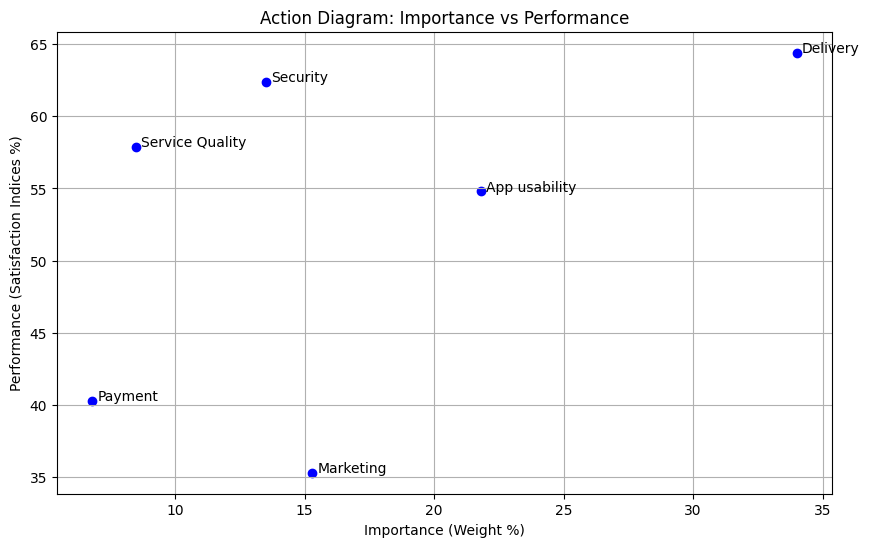

In [ ]:
import matplotlib.pyplot as plt

# Data from the table
criteria = [
    'App usability', 'Delivery', 'Marketing', 'Payment',
    'Security', 'Service Quality'
]

weights = [21.8, 34.0, 15.3, 6.8, 13.5, 8.5]
satisfaction_indices = [54.8, 64.4, 35.3, 40.3, 62.4, 57.9]

# Create a scatter plot for the Action Diagram
plt.figure(figsize=(10, 6))
plt.scatter( weights, satisfaction_indices, color='blue')

# Add annotations for each criterion
for i, label in enumerate(criteria):
    plt.text(weights[i]+0.2, satisfaction_indices[i], label, fontsize=10)

# Set labels and title
plt.xlabel('Importance (Weight %)')
plt.ylabel('Performance (Satisfaction Indices %)')
plt.title('Action Diagram: Importance vs Performance')

# Show grid for better readability
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
import pandas as pd

# Create a DataFrame with the sub-criteria, weights, and satisfaction indices
data = {
    'Sub-criteria': criteria_sub,
    'Weight (%)': weights_sub,
    'Satisfaction Indices (%)': satisfaction_indices_sub
}

df = pd.DataFrame(data)

# Calculate the priority score by multiplying weight by (1 - satisfaction index / 100)
df['Priority Score'] = df['Weight (%)'] * (1 - df['Satisfaction Indices (%)'] / 100)

# Rank the sub-criteria by priority (higher score indicates higher priority)
df['Rank'] = df['Priority Score'].rank(ascending=False)

# Sort the DataFrame by Rank
df_sorted = df.sort_values(by='Rank')

display(df_sorted)

,Sub-criteria,Weight (%),Satisfaction Indices (%),Priority Score,Rank
5,Delivery - Delivery Quality,28.9,66.8,9.5948,1.0
7,Marketing - Advertising frequency,6.7,9.4,6.0702,2.0
13,Security - Scam/Fraud detection,13.4,62.9,4.9714,3.0
0,App usability - App download/update,5.5,24.0,4.1800,4.0
16,Service Quality - Customer service,8.3,58.9,3.4113,5.0
4,App usability - UI/UX,11.3,76.2,2.6894,6.0
6,Delivery - Shipping Fee,5.1,50.9,2.5041,7.0
8,Marketing - Newbies guide/gamification,5.5,57.5,2.3375,8.0
11,Payment - E-wallet,3.2,39.6,1.9328,9.0
10,Payment - Cash on delivery,3.1,42.8,1.7732,10.0


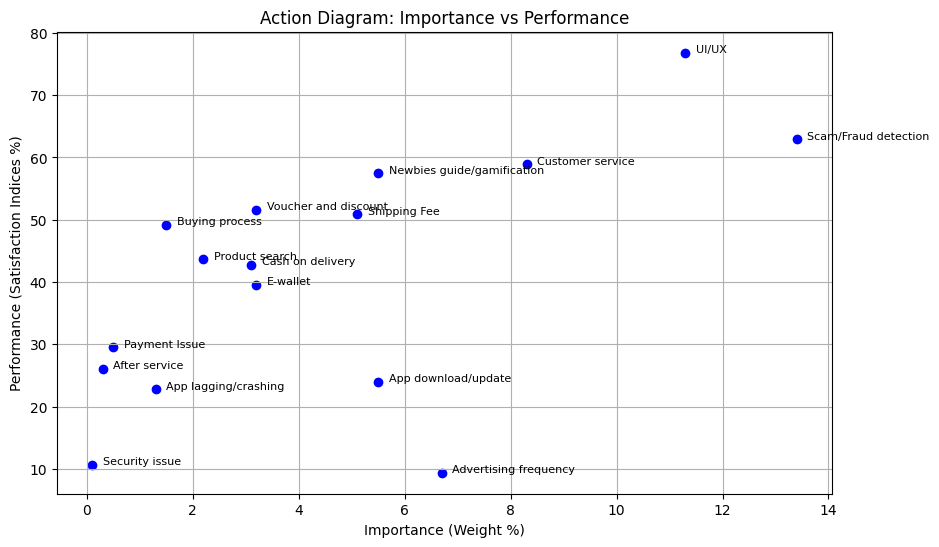

In [ ]:
import matplotlib.pyplot as plt

# Data from the table
criteria = [
    'App usability', 'Delivery', 'Marketing', 'Payment',
    'Security', 'Service Quality'
]

weights = [21.8, 34.0, 15.3, 6.8, 13.5, 8.5]
satisfaction_indices = [54.8, 64.4, 35.3, 40.3, 62.4, 57.9]

# Sub-criteria data
sub_criteria = [
    'App download/update', 'App lagging/crashing',
    'Buying process', 'Product search',
    'UI/UX',
    'Shipping Fee', 'Advertising frequency',
    'Newbies guide/gamification', 'Voucher and discount',
    'Cash on delivery', 'E-wallet',
    'Payment Issue', 'Scam/Fraud detection',
    'Security issue', 'After service',
    'Customer service'
]

sub_weights = [
    5.5, 1.3, 1.5, 2.2, 11.3, 5.1, 6.7,
    5.5, 3.2, 3.1, 3.2, 0.5, 13.4, 0.1, 0.3, 8.3
]

sub_satisfaction_indices = [
    24.0, 22.8, 49.2, 43.7, 76.8, 50.9, 9.4,
    57.5, 51.6, 42.8, 39.6, 29.5, 62.9, 10.7, 26.1, 58.9
]

# Create a scatter plot for the Action Diagram
plt.figure(figsize=(10, 6))
plt.scatter(sub_weights, sub_satisfaction_indices, color='blue')

# Add annotations for each sub-criterion
for i, label in enumerate(sub_criteria):
    plt.text(sub_weights[i] + 0.2, sub_satisfaction_indices[i], label, fontsize=8)

# Set labels and title
plt.xlabel('Importance (Weight %)')
plt.ylabel('Performance (Satisfaction Indices %)')
plt.title('Action Diagram: Importance vs Performance')

# Show grid for better readability
plt.grid(True)

# Show the plot
plt.show()

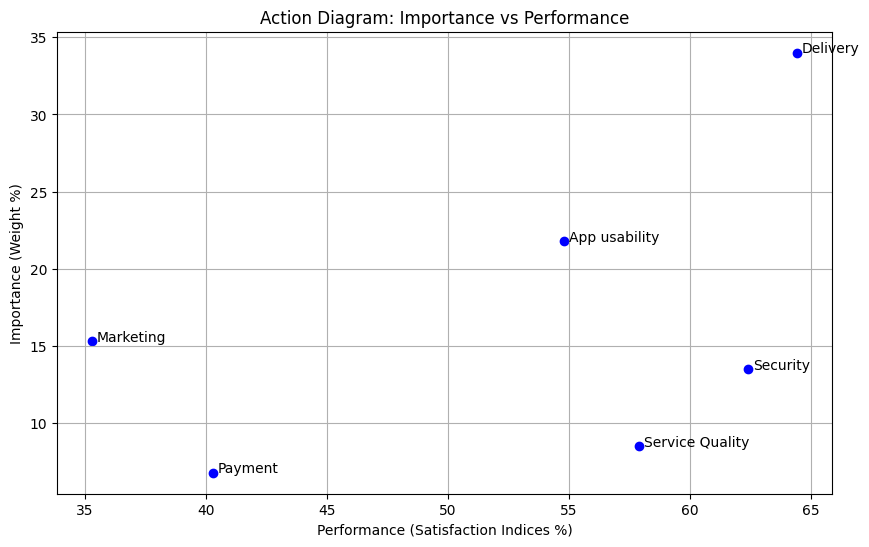

In [ ]:
import matplotlib.pyplot as plt

# Data from the table
criteria = [
    'App usability', 'Delivery', 'Marketing', 'Payment',
    'Security', 'Service Quality'
]

weights = [21.8, 34.0, 15.3, 6.8, 13.5, 8.5]
satisfaction_indices = [54.8, 64.4, 35.3, 40.3, 62.4, 57.9]

# Create a scatter plot for the Action Diagram
plt.figure(figsize=(10, 6))
plt.scatter(satisfaction_indices, weights, color='blue')

# Add annotations for each criterion
for i, label in enumerate(criteria):
    plt.text(satisfaction_indices[i] + 0.2, weights[i], label, fontsize=10)

# Set labels and title
plt.xlabel('Performance (Satisfaction Indices %)')
plt.ylabel('Importance (Weight %)')
plt.title('Action Diagram: Importance vs Performance')

# Show grid for better readability
plt.grid(True)

# Show the plot
plt.show()